# <p style='color: red; text-align: center;'>Traitement et Nettoyage des Données</p>

In [ ]:
import pandas as pd
import json


## <p style='color: blue'>1. Collecte des Données à partir de Fichiers JSON</p>

## 📂 Chargement des Données
### Fichiers JSON
- Source : Fichiers JSON tels que yelp_academic_dataset_business, yelp_academic_dataset_review, etc.
- Format : JSONL (JSON Lines)

#### Techniques Utilisées
- Chargement : Utilisation de pandas.read_json
- Division : Division des fichiers volumineux en plus petits morceaux pour faciliter le traitement.

1. A partir du fichier yelp_academic_dataset_business

In [ ]:
# Chargement des données depuis un fichier JSON au format "lines" (JSONL)
business_df = pd.read_json('data_json/yelp_academic_dataset_business.json', lines=True)

# Affichage des noms des colonnes pour comprendre la structure du DataFrame
print(f"Noms des colonnes : {business_df.columns.tolist()}")

Noms des colonnes : ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']


2. A partir du fichier yelp_academic_dataset_checkin

In [ ]:
# Chargement des données de check-in depuis un fichier JSON au format "lines" (JSONL)
checkin_df = pd.read_json('data_json/yelp_academic_dataset_checkin.json', lines=True)

# Affichage des noms des colonnes pour examiner la structure du DataFrame
print(f"Noms des colonnes : {checkin_df.columns.tolist()}")

Noms des colonnes : ['business_id', 'date']


3. A partir du fichier yelp_academic_dataset_review

3. 1. Division des Fichiers JSON de Grande Taille


In [ ]:
def split_large_json(file_path, output_prefix, lines_per_chunk=1_000_000):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            chunk_lines = []
            chunk_count = 1

            for line_number, line in enumerate(file, start=1):
                chunk_lines.append(line.strip())

                # Sauvegarder le chunk lorsque la taille maximale est atteinte
                if line_number % lines_per_chunk == 0:
                    output_file = f"{output_prefix}_part_{chunk_count}.json"
                    with open(output_file, 'w', encoding='utf-8') as output:
                        output.write("[\n" + ",\n".join(chunk_lines) + "\n]")  # JSON valide
                    print(f"Partie {chunk_count} sauvegardée dans {output_file}")
                    chunk_lines = []  # Réinitialiser les lignes
                    chunk_count += 1

            # Sauvegarder les lignes restantes
            if chunk_lines:
                output_file = f"{output_prefix}_part_{chunk_count}.json"
                with open(output_file, 'w', encoding='utf-8') as output:
                    output.write("[\n" + ",\n".join(chunk_lines) + "\n]")  # JSON valide
                print(f"Partie {chunk_count} sauvegardée dans {output_file}")
    except Exception as e:
        print(f'Erreur lors de la division du fichier JSON : {e}')

# Appeler la fonction
split_large_json('data_json/yelp_academic_dataset_review.json', 'data_json/yelp_review', lines_per_chunk=1_000_000)


Partie 1 sauvegardée dans yelp_review_part_1.json
Partie 2 sauvegardée dans yelp_review_part_2.json
Partie 3 sauvegardée dans yelp_review_part_3.json
Partie 4 sauvegardée dans yelp_review_part_4.json
Partie 5 sauvegardée dans yelp_review_part_5.json
Partie 6 sauvegardée dans yelp_review_part_6.json
Partie 7 sauvegardée dans yelp_review_part_7.json


3. 2. Fusion des Parties JSON dans un DataFrame


In [ ]:
def load_json_parts_to_dataframe(output_prefix, total_parts):
    all_data = []  # Liste pour stocker toutes les données des fichiers
    for part_number in range(1, total_parts + 1):
        file_path = f"{output_prefix}_part_{part_number}.json"
        print(f"Chargement du fichier {file_path}...")
        with open(file_path, 'r', encoding='utf-8') as file:
            # Charger les données JSON
            data = json.load(file)
            all_data.extend(data)  # Ajouter les données à la liste principale

    # Convertir en DataFrame
    df = pd.DataFrame(all_data)
    return df

# Charger les 7 fichiers dans une DataFrame
review_df = load_json_parts_to_dataframe('data_json/yelp_review_parts/yelp_review', total_parts=7)

# Vérification des dimensions
print(f"Nombre total de lignes : {review_df.shape[0]}")
print(f"Noms des colonnes : {review_df.columns.tolist()}")

Chargement du fichier yelp_review_part_1.json...
Chargement du fichier yelp_review_part_2.json...
Chargement du fichier yelp_review_part_3.json...
Chargement du fichier yelp_review_part_4.json...
Chargement du fichier yelp_review_part_5.json...
Chargement du fichier yelp_review_part_6.json...
Chargement du fichier yelp_review_part_7.json...
Nombre total de lignes : 6990280
Noms des colonnes : ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


4. A partir du fichier yelp_academic_dataset_tip

In [ ]:
tip_df = pd.read_json('data_json/yelp_academic_dataset_tip.json', lines=True)
tip_df.shape
print(f"Noms des colonnes : {tip_df.columns.tolist()}")

Noms des colonnes : ['user_id', 'business_id', 'text', 'date', 'compliment_count']


5. A partir du fichier yelp_academic_dataset_user

5. 1. Division des Fichiers JSON de Grande Taille


In [ ]:
def split_large_json(file_path, output_prefix, lines_per_chunk=1_000_000):
    try :
        with open(file_path, 'r', encoding='utf-8') as file:
            chunk_lines = []
            chunk_count = 1

            for line_number, line in enumerate(file, start=1):
                chunk_lines.append(line.strip())

                # Sauvegarder le chunk lorsque la taille maximale est atteinte
                if line_number % lines_per_chunk == 0:
                    output_file = f"{output_prefix}_part_{chunk_count}.json"
                    with open(output_file, 'w', encoding='utf-8') as output:
                        output.write("[\n" + ",\n".join(chunk_lines) + "\n]")  # JSON valide
                    print(f"Partie {chunk_count} sauvegardée dans {output_file}")
                    chunk_lines = []  # Réinitialiser les lignes
                    chunk_count += 1

            # Sauvegarder les lignes restantes
            if chunk_lines:
                output_file = f"{output_prefix}_part_{chunk_count}.json"
                with open(output_file, 'w', encoding='utf-8') as output:
                    output.write("[\n" + ",\n".join(chunk_lines) + "\n]")  # JSON valide
                print(f"Partie {chunk_count} sauvegardée dans {output_file}")
    except Exception as e:
        print(f'Erreur lors de la division du fichier JSON : {e}')

# Appeler la fonction
split_large_json('data_json/yelp_academic_dataset_user.json', 'data_json/yelp_user', lines_per_chunk=1_000_000)

Partie 1 sauvegardée dans yelp_user_part_1.json
Partie 2 sauvegardée dans yelp_user_part_2.json


5. 2. Fusion des Parties JSON dans un DataFrame

In [ ]:
def load_json_parts_to_dataframe(output_prefix, total_parts):
    all_data = []  # Liste pour stocker toutes les données des fichiers
    for part_number in range(1, total_parts + 1):
        file_path = f"{output_prefix}_part_{part_number}.json"
        print(f"Chargement du fichier {file_path}...")
        with open(file_path, 'r', encoding='utf-8') as file:
            # Charger les données JSON
            data = json.load(file)
            all_data.extend(data)  # Ajouter les données à la liste principale

    # Convertir en DataFrame
    df = pd.DataFrame(all_data)
    return df

# Charger les 7 fichiers dans une DataFrame
user_df = load_json_parts_to_dataframe('data_json/yelp_user_parts/yelp_user', total_parts=2)

# Vérification des dimensions
print(f"Nombre total de lignes : {user_df.shape[0]}")
print(f"Noms des colonnes : {user_df.columns.tolist()}")


Chargement du fichier yelp_user_part_1.json...
Chargement du fichier yelp_user_part_2.json...
Nombre total de lignes : 1987897
Noms des colonnes : ['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


## <p style='color: blue'>2. Sélection des Colonnes Pertinentes</p>

## 🎯 Sélection des Colonnes Clés
### Colonnes Sélectionnées
- Business : business_id, categories, stars, review_count
- Review : review_id, user_id, business_id, stars, text
- Tip : user_id, business_id
- User : user_id, review_count, average_stars, fans

### Objectif
- Simplification des données pour une analyse plus efficace.

1. Pour dataframe business_df

In [ ]:
# Sélection des colonnes pertinentes pour l'analyse
business_df = business_df[['business_id', 'categories', 'stars', 'review_count']]

# Affichage des 5 premières lignes pour une inspection rapide des données
business_df.head()


,business_id,categories,stars,review_count
0,Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",5.0,7
1,mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",3.0,15
2,tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",3.5,22
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,80
4,mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",4.5,13


2. Pour dataframe review_df

In [ ]:
# Sélection des colonnes pertinentes pour le DataFrame review_df
review_df = review_df[['review_id', 'user_id', 'business_id', 'stars', 'text']]

# Affichage des 5 premières lignes pour vérifier les données
review_df.head()


,review_id,user_id,business_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...


3. Pour dataframe tip_df

In [ ]:
# Sélection des colonnes pertinentes pour le DataFrame tip_df
tip_df = tip_df[['user_id', 'business_id']]

# Affichage des 5 premières lignes pour vérifier les données
tip_df.head()

,user_id,business_id
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww


4. Pour dataframe user_df

In [ ]:
# Sélection des colonnes pertinentes pour le DataFrame user_df
user_df = user_df[['user_id', 'review_count', 'average_stars', 'fans']]

# Affichage des 5 premières lignes pour vérifier les données
user_df.head()

,user_id,review_count,average_stars,fans
0,qVc8ODYU5SZjKXVBgXdI7w,585,3.91,267
1,j14WgRoU_-2ZE1aw1dXrJg,4333,3.74,3138
2,2WnXYQFK0hXEoTxPtV2zvg,665,3.32,52
3,SZDeASXq7o05mMNLshsdIA,224,4.27,28
4,hA5lMy-EnncsH4JoR-hFGQ,79,3.54,1


## <p style='color: blue'>3. Fusion des DataFrames pour Consolidation des Informations</p>

## 🔗 Fusion des DataFrames
### Techniques de Fusion
- Merge : Utilisation de pandas.merge pour combiner les DataFrames sur des clés communes.
- Clés de Fusion : business_id, user_id

### Objectif
- Consolidation des informations pour une analyse plus complète.

In [ ]:
# Fusion des DataFrames pour consolider les informations des avis, entreprises, utilisateurs et tips :
# 1. Fusion de `review_df` et `business_df` sur la clé commune `business_id` :
#    - `how='inner'` garantit que seules les lignes présentes dans les deux DataFrames sont conservées.
#    - Objectif : Associer les avis (`review_df`) aux entreprises correspondantes (`business_df`).
merged_df = review_df.merge(business_df, on='business_id', how='inner')

# 2. Fusion du résultat avec `user_df` sur la clé commune `user_id` :
#    - `how='inner'` conserve uniquement les avis associés à des utilisateurs valides présents dans les deux DataFrames.
#    - Objectif : Ajouter les informations utilisateur (nombre d'avis, moyenne des notes, etc.) aux avis.
merged_df = merged_df.merge(user_df, on='user_id', how='inner')


# 3. Fusion avec `tip_df` sur les clés communes `user_id` et `business_id` :
#    - `how='outer'` permet d'inclure toutes les relations possibles entre utilisateurs et entreprises,
#      même si elles ne figurent pas dans les avis ou les informations principales.
#    - Objectif : Ajouter toutes les relations supplémentaires entre utilisateurs et entreprises,
#      en particulier celles qui ne figurent pas dans `review_df`.
merged_df = merged_df.merge(tip_df, on=['user_id', 'business_id'], how='outer')

# Le DataFrame final, `merged_df`, contient une consolidation des données de :
# - Avis clients (texte, étoiles, etc.)
# - Entreprises (catégories, popularité, etc.)
# - Utilisateurs (activité, popularité, etc.)
# - Relations utilisateur-entreprise issues des tips.


- Sauvegarde du DataFrame Consolidé dans un Fichier CSV

In [ ]:
# Sauvegarder dans un fichier CSV
merged_df.to_csv('data_csv/dataset.csv', index=False, encoding='utf-8')

## <p style='color: blue'>4. Préparation des Données : Prétraitement, Transformation et Nettoyage du Texte pour l'Analyse</p>

## 🧹 Nettoyage des Données
### Vérification Initiale
- Valeurs Manquantes : Détection et comptage des valeurs manquantes.
- Doublons : Identification et suppression des doublons.

### Nettoyage du Texte
- Tokenisation : Division du texte en mots individuels.
- Suppression des Mots Vides : Élimination des mots courants sans valeur sémantique.
- Lemmatisation : Réduction des mots à leur forme de base.

4.1. Vérification et Nettoyage Initial des Données


- Chargement et affichage des premières lignes du fichier CSV

In [ ]:
# Charger le fichier CSV pour vérifier
df = pd.read_csv('data_csv/dataset.csv')
print(df.head())  # Affiche les premières lignes du DataFrame
print(f"Dimensions : {df.shape}")  # Affiche la taille du DataFrame

                review_id                 user_id             business_id  \
0  rJ3CASyRfG-7ZviCBFCJQg  ---1lKK3aKOuomHnwAkAow  f19eLfhXqR47Ct8Hz2y_pA   
1  S6qcxvgYMymqVlWcaNDm2Q  ---2PmXbF47D870stH1jqA  0ZsqqzHu1HHkDdIKoivi5g   
2  YCPbHhuT1u-7DeWW9lEHuw  ---2PmXbF47D870stH1jqA  1An4DxtMmvvSe0HX4viRCA   
3  c4epF4UIlXj1gvDsBa6cIA  ---2PmXbF47D870stH1jqA  1An4DxtMmvvSe0HX4viRCA   
4  hepOKRE2O5gXDWLKkAjn5w  ---2PmXbF47D870stH1jqA  1An4DxtMmvvSe0HX4viRCA   

   stars_x                                               text  \
0      5.0  I hard think luxurious experience begins to de...   
1      5.0  The TAMPA TREASURE and his TEAM have hit anoth...   
2      5.0  We ate here on 4/4/14..... They have a great E...   
3      5.0  This is our go to restaurant for Italian Food....   
4      5.0  Dinner here last night...Their 7" personal pan...   

                                          categories  stars_y  review_count_x  \
0  Doctors, Active Life, Float Spa, Health & Medi...      5.0    

- Vérification des valeurs manquantes

In [ ]:
# Vérification des valeurs manquantes
df.isna().sum()  # Compte le nombre de valeurs manquantes par colonne

review_id         539468
user_id                0
business_id            0
stars_x           539468
text              539468
categories        540160
stars_y           539468
review_count_x    539468
review_count_y    539468
average_stars     539468
fans              539468
dtype: int64

- Vérification des doublons dans le DataFrame

In [ ]:
# Vérification des doublons dans le DataFrame
df.duplicated().sum()  # Compte le nombre de doublons dans le DataFrame

163996

In [ ]:
# Vérification des doublons dans les colonnes 'user_id', 'text', 'stars_x'
df[['user_id', 'text', 'stars_x']].duplicated().sum()  # Compte les doublons spécifiques à ces colonnes

454207

4.2. Suppression des Doublons

- Suppression des doublons dans l'ensemble du DataFrame

In [ ]:
# Suppression des doublons
df = df.drop_duplicates()  # Supprime les doublons du DataFrame

- Supprimer les Lignes avec des Valeurs Manquantes dans la Colonne 'text' :

In [ ]:
# Supprimer les lignes où 'text' est NaN
df = df.dropna(subset=['text'])

- Suppression des doublons spécifiques dans les colonnes 'user_id', 'text' et 'stars_x'

In [ ]:
# Suppression des doublons sur ces colonnes
df = df.drop_duplicates(subset=['user_id', 'text', 'stars_x'])

- Vérification après suppression des doublons :

In [ ]:
# Vérification après suppression des doublons
df[['user_id', 'text', 'stars_x']].duplicated().sum()  # Compte les doublons restants sur ces colonnes

0

4.3. Gestion des Valeurs Manquantes dans la Colonne 'Categories' :

In [ ]:
# Remplir les valeurs manquantes dans la colonne 'categories' par 'unknown'
df['categories'] = df['categories'].fillna('unknown')

4.4. Résultats du Nettoyage des Données

In [ ]:
# Résultats après nettoyage
print(f"Dimensions finales du dataset : {df.shape}")  # Affiche les dimensions après nettoyage
print(f"Valeurs manquantes restantes : \n{df.isna().sum()}")  # Affiche les valeurs manquantes restantes
print(f"Nombre de doublons restants : {df.duplicated().sum()}")  # Affiche le nombre de doublons restants

Dimensions finales du dataset : (6975802, 11)
Valeurs manquantes restantes : 
review_id         0
user_id           0
business_id       0
stars_x           0
text              0
categories        0
stars_y           0
review_count_x    0
review_count_y    0
average_stars     0
fans              0
dtype: int64
Nombre de doublons restants : 0


4.5. Nettoyage du Texte : Préparation pour l'Analyse :

- Définition de la fonction de nettoyage du texte

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')



# Fonction pour convertir les étiquettes POS de nltk en format WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    try:
        # Minuscule
        text = text.lower()
        # Supprimer les caractères spéciaux et chiffres
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        # Tokenisation
        tokens = word_tokenize(text)
        # Suppression des mots vides
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatisation
        pos_tags = nltk.pos_tag(tokens)
        tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]


        return ' '.join(tokens)
    except Exception as e:
            print(f"Erreur : {e}")
            return text

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\HP
[nltk_data]     Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HP
[nltk_data]     Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP Victus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP Victus\AppData\Roaming\nltk_data...
[nltk_dat

- Application de la fonction de nettoyage

In [ ]:
# Appliquer la fonction de nettoyage sur la colonne 'text'
df['cleaned_text'] = df['text'].apply(clean_text)

# Afficher un aperçu des résultats
print(df.head())

                review_id                 user_id             business_id  \
0  rJ3CASyRfG-7ZviCBFCJQg  ---1lKK3aKOuomHnwAkAow  f19eLfhXqR47Ct8Hz2y_pA   
1  S6qcxvgYMymqVlWcaNDm2Q  ---2PmXbF47D870stH1jqA  0ZsqqzHu1HHkDdIKoivi5g   
2  YCPbHhuT1u-7DeWW9lEHuw  ---2PmXbF47D870stH1jqA  1An4DxtMmvvSe0HX4viRCA   
3  c4epF4UIlXj1gvDsBa6cIA  ---2PmXbF47D870stH1jqA  1An4DxtMmvvSe0HX4viRCA   
4  hepOKRE2O5gXDWLKkAjn5w  ---2PmXbF47D870stH1jqA  1An4DxtMmvvSe0HX4viRCA   

   stars_x                                               text  \
0      5.0  I hard think luxurious experience begins to de...   
1      5.0  The TAMPA TREASURE and his TEAM have hit anoth...   
2      5.0  We ate here on 4/4/14..... They have a great E...   
3      5.0  This is our go to restaurant for Italian Food....   
4      5.0  Dinner here last night...Their 7" personal pan...   

                                          categories  stars_y  review_count_x  \
0  Doctors, Active Life, Float Spa, Health & Medi...      5.0    

- suppresion des valeurs manquants

In [ ]:
df = df.dropna()

- Sauvegarde des Données Nettoyées dans un Fichier CSV

In [ ]:
# Sauvegarder le DataFrame nettoyé dans un fichier CSV
df.to_csv('data_csv/cleaned_dataset_.csv', index=False, encoding='utf-8')
print("Données nettoyées sauvegardées dans 'cleaned_dataset.csv'")


Données nettoyées sauvegardées dans 'cleaned_dataset.csv'


## <p style='color: blue'>5. Création de Nouvelles Features Basées sur les Données Existantes</p>

## 🛠️ Création de Features
## Feature 'rating'
- Définition : Catégorisation des étoiles en Positive, Negative, Neutral.
- Objectif : Simplifier l'analyse en regroupant les évaluations.

## Visualisation
- Distribution : Affichage de la répartition des classes de rating.

1. Création de la feature rating :

In [ ]:
df['rating'] = df['stars_x'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})


2. Affichage de la distribution des rating :

rating
Positive    4780493
Negative    1621813
Neutral      701421
Name: count, dtype: int64


<Axes: title={'center': 'Distribution des classes (rating)'}, xlabel='rating'>

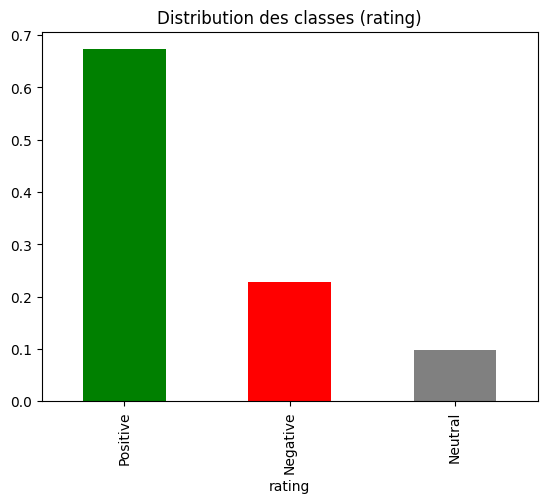

In [ ]:
print(df['rating'].value_counts())
df['rating'].value_counts(normalize=True).plot(kind='bar', title='Distribution des classes (rating)', color=['green', 'red', 'gray'])


3. Distribution de stars_x :

stars_x
5.0    3294791
4.0    1485702
1.0    1073975
3.0     701421
2.0     547838
Name: count, dtype: int64


<Axes: title={'center': 'Distribution des classes (rating)'}, xlabel='stars_x'>

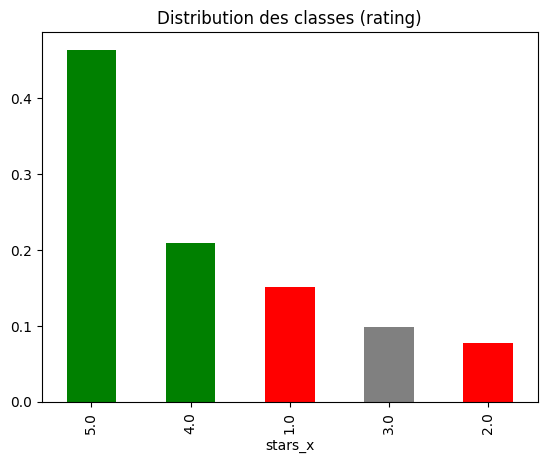

In [ ]:
colors = {
    1.0: 'red',
    2.0: 'red',
    3.0: 'gray',
    4.0: 'green',
    5.0: 'green'
}
print(df['stars_x'].value_counts())
df['stars_x'].value_counts(normalize=True).plot(kind='bar', title='Distribution des classes (rating)', color=[colors[x] for x in df['stars_x'].value_counts().index])

4. Analyse croisée entre rating et categories :

In [ ]:
print(df.groupby('rating')['categories'].value_counts().head(10))


rating    categories                                        
Negative  Restaurants, Mexican                                  12190
          Mexican, Restaurants                                  11200
          Beauty & Spas, Nail Salons                            10460
          Restaurants, Pizza                                     9702
          Nail Salons, Beauty & Spas                             8914
          Pizza, Restaurants                                     8838
          Restaurants, Chinese                                   7053
          Chinese, Restaurants                                   6740
          Italian, Restaurants                                   5948
          Hotels, Event Planning & Services, Hotels & Travel     5362
Name: count, dtype: int64


## <p style="color: blue;">6. Sélection des Colonnes Clés pour l'Analyse et la Modélisation</p>


## 📊 Sélection des Colonnes Clés
### Colonnes Sélectionnées
- Text : cleaned_text
- Rating : rating

### Objectif
- Concentration sur les données essentielles pour la modélisation.

1. Sélection des Colonnes 'rating' et 'text' :

In [ ]:
df_selected = df[['rating', 'cleaned_text']]

# Afficher les premières lignes pour vérifier
print(df_selected.head())

     rating                                       cleaned_text
0  Positive  hard think luxurious experience begin describe...
1  Positive  tampa treasure team hit another home run go so...
2  Positive  ate great eggplant caprese appetizer get dinne...
3  Positive  go restaurant italian food every weekend lasag...
4  Positive  dinner last nighttheir personal pan whole whea...


2. Sauvegarde du Sous-ensemble 'Text' et 'Rating' dans un Fichier CSV :

In [ ]:
# Sauvegarder ce ensemble dans un fichier CSV
df_selected.to_csv('review_text_and_ratings.csv', index=False, encoding='utf-8')


## <p style="color: blue;">7. Échantillonnage aléatoire 🎲</p>

### Technique
- Échantillonnage Stratifié : Prise d'un échantillon aléatoire pour chaque classe de rating.
- Taille : 650 000 échantillons pour Positive et Negative, 292 497 pour Neutral.

## Objectif
- Équilibrage des classes pour une modélisation plus robuste.

1. Calcul de la Proportion des Classes 'rating' dans l'Échantillon et le Dataset Complet :

In [ ]:
percentages = df.rating.value_counts(normalize='True') * 100
percentages = percentages.round(2)
print(percentages.apply(lambda x: f"{x}%"))

rating
Positive     67.3%
Negative    22.83%
Neutral      9.87%
Name: proportion, dtype: object


2. Prise d'un échantillon aléatoire pour chaque classe de rating



In [ ]:
# Sélectionner un échantillon aléatoire de 650 000 lignes pour chaque classe de rating
positive_sample = df_selected[df_selected['rating'] == 'Positive'].sample(n=650000, random_state=42)
negative_sample = df_selected[df_selected['rating'] == 'Negative'].sample(n=650000, random_state=42)
neutral_sample = df_selected[df_selected['rating'] == 'Neutral'].sample(n=292497, random_state=42)

# Combiner les échantillons dans un seul DataFrame
balanced_df = pd.concat([positive_sample, negative_sample, neutral_sample])

# Mélanger les lignes pour éviter toute séquence prévisible
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Afficher les premières lignes du DataFrame équilibré
print(balanced_df.head())

# Sauvegarder le DataFrame équilibré dans un fichier CSV
balanced_df.to_csv('data_csv/balanced_subset.csv', index=False, encoding='utf-8')

     rating                                       cleaned_text
0  Negative  love seis food word warn order food go monday ...
1  Negative  disappoint wait minute counter breakfast tell ...
2   Neutral  place decorate beautifully enough hold wed rec...
3  Positive  place get atmosphere sunset completely agree r...
4   Neutral  upon ask im think youre likely get one follow ...
